In [140]:
# Use pandas to create a Series from the following data:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fruits =  pd.Series(["kiwi", "mango", "strawberry", "pineapple",
"gala apple", "honeycrisp apple", "tomato", "watermelon",
"honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry",
"blackberry", "gooseberry", "papaya"])

In [141]:
# Run .describe() on the series to see what describe returns for a series of strings.
# print(fruits.describe(include='all'))

# Using the `.describe` pandas method I can generate descriptive statistics about my data.
# It returns a series of values that I can reference directly using dot notation or bracket
# notation.
print(fruits.describe())

count       17
unique      13
top       kiwi
freq         4
dtype: object


In [142]:
# Run the code necessary to produce only the unique fruit names.

# I can use pandas `.unique` method to find all unique values is my dataset. Meaning
# it returns all values that occur in the dataset, ignoring multiples of a value.
# Kiwi has 4 instances in dataset fruits, but is only represented in `.unique` once.
print(fruits.unique())

['kiwi' 'mango' 'strawberry' 'pineapple' 'gala apple' 'honeycrisp apple'
 'tomato' 'watermelon' 'honeydew' 'blueberry' 'blackberry' 'gooseberry'
 'papaya']


In [143]:
# Determine how many times each value occurs in the series.

# Using pandas `.unique` method I can return the unique values with their count. I can
# return the number of times each unique value occurs in a dataset.
# If I can normalize my dataset using the keyword parameter 'normalize'.
# It return the fractional value of a datapoints representation in a dataset.
# Kiwi was the most frequently occurring object in the dataset - It has a normalized value
# or representative value of 24%.
# print(fruits.value_counts(normalize=True))

print(fruits.value_counts())

kiwi                4
mango               2
gala apple          1
watermelon          1
strawberry          1
tomato              1
papaya              1
pineapple           1
honeydew            1
gooseberry          1
blackberry          1
honeycrisp apple    1
blueberry           1
dtype: int64


In [144]:
# Determine the most frequently occurring fruit name from the series.

# Pandas `pd.Series.mode()` returns the highest frequency value in a series.
# Kiwi is returned because it appears 4 times in our dataset.
# Alternatively, I could use .notation to pick out Kiwi from the `.describe` method
# Using `d.Series.describe().top`
# print(fruits.describe().top)

print(fruits.mode())

0    kiwi
dtype: object


In [145]:
# Determine the least frequently occurring fruit name from the series.

# By using `.describe` and `.value_counts` I have a better foundational 
# understanding of the dataset.

# Using numpy style indexing, I can retrieve fruits that occur once in the dataset by using
# A boolean mask inside fruits.value_counts()[]. The conditional expression inside
# the brackets creates a boolean array of True and False values if a fruit/datapoint
# only occurs once in a dataset. The evaluated Series returns datapoints with only
# one instance.
# print(fruits.value_counts()[fruits.value_counts() == 1])

# Alternative method is to use `fruits.value_counts(ascending=True).head(n)`.
# n requires that I know the number of values with the lowest frequency. Using
# `.value_counts` I can see all values and their frequency in the dataset. 
# Like SQL's LIMIT, I can use `value_counts` keyword parameter `ascending` -> True to order
# smallest values first. I use`.head` to return the 11 datapoints that occur only once in
# the dataset.
# fruits.value_counts(ascending=True).head(11)

# I use pandas `n.smallest' method to return the least frequently occuring fruit names.
# Using the `n.smallest` keyword parameter `keep`, I can return ALL least occurring values
# if there are multiple values in a dataset using - .nsmallest(keep='all').
print(fruits.value_counts().nsmallest(keep='all'))

gala apple          1
watermelon          1
strawberry          1
tomato              1
papaya              1
pineapple           1
honeydew            1
gooseberry          1
blackberry          1
honeycrisp apple    1
blueberry           1
dtype: int64


In [146]:
# Write the code to get the longest string from the fruits series.

# I can use a boolean mask to return the longest string.
# Alternatively, I can use the `max` function and pass the dataset with a `key=len` to
# return the longest string

# I realzied I cannot chain `.max` on `.len`. It returns the incorrect values...
# I have to wrap the pandas method calls inside of Python's built-in `max` function.
print(fruits[fruits.str.len() == max(fruits.str.len())])

# print(max(fruits, key=len))

5    honeycrisp apple
dtype: object


In [147]:
# Find the fruit(s) with 5 or more letters in the name.

# I use a boolean mask to find strings with a length of 5 or greater.
print(fruits[fruits.str.len() >= 5])

1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object


In [148]:
# Capitalize all the fruit strings in the series.

# I use the `title` method instead of the `capitalize` method because `honeycrisp apple`
# has a space between its name.
print(fruits.str.title())

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala Apple
5     Honeycrisp Apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object


In [149]:
# Count the letter "a" in all the fruits (use string vectorization)

# I use `count` to find all 'a's in each string. I use `sum` to total a's in the
# fruits dataset.
letter_a_in_fruits = fruits.str.count('a')
print(sum(letter_a_in_fruits))

14


In [150]:
# Output the number of vowels in each and every fruit.

# I use `count` a regular expression to find all instances of vowels in each string.
vowels_in_fruits = fruits.str.count('[aeiou]')
print(sum(vowels_in_fruits))

49


In [151]:
# Use the .apply method and a lambda function to find the fruit(s) containing two 
# or more "o" letters in the name.
# print(fruits.apply(lambda x: x.count('o') >= 2))

# Using the `apply` method I can create a boolean mask to find strings with 2 or more O's.
# I can pass the boolean array to the fruits dataset to return friuts with 2 or more O's.
fruits_with_two_Os = fruits[fruits.apply(
    lambda x: x.count('o') >= 2)]

print(fruits_with_two_Os)

6         tomato
15    gooseberry
dtype: object


In [152]:
# Write the code to get only the fruits containing "berry" in the name

# Similarly I can use a boolean mask to find all strings that contain `berry`.
fruits_with_berry = fruits[fruits.apply(
    lambda x: x.count('berry') > 0)]
print(fruits_with_berry)

# I can use the `contains` method to find all strings that contain the substring `berry`.
# I pass the boolean mask to the fruits dataset to return all fruits with `berry` in their
# name.
# print(fruits[fruits.str.contains('berry')])

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object


In [153]:
# Write the code to get only the fruits containing "apple" in the name
fruits_with_apple = fruits[fruits.apply(
    lambda x: x.count('apple') > 0)]
print(fruits_with_apple)

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object


In [154]:
# Which fruit has the highest amount of vowels?
fruit_with_most_vowels = fruits[max(
    fruits.str.count('[aeiou]'))]
print(fruit_with_most_vowels)

honeycrisp apple


In [155]:
# Use pandas to create a Series from the following data:

values = pd.Series(['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98',
'$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00',
'$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97',
'$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94',
'$452,650.23'])

In [156]:
# What is the data type of the series?
type(values)

pandas.core.series.Series

In [157]:
# Use series operations to convert the series to a numeric data type.

# Using regular expression's I can replace `$` and `,` at the same time.
values = values.str.replace('[$,]', '').astype(float)

In [158]:
# What is the maximum value? The minimum?
value_max = values.max()
value_min = values.min()

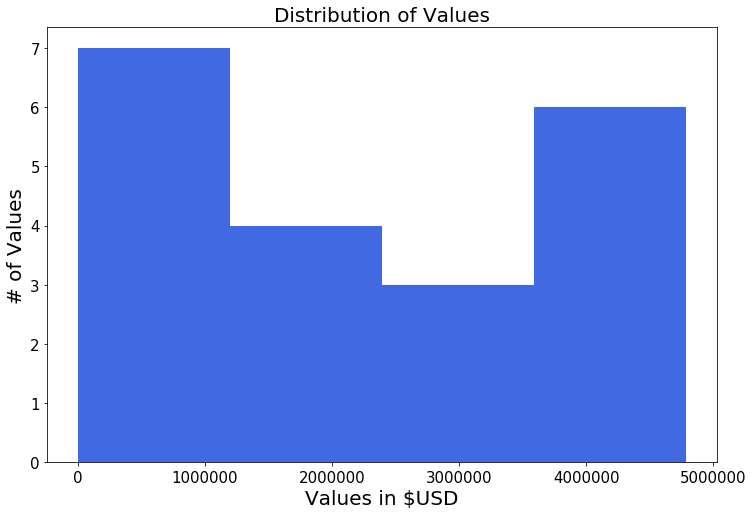

In [159]:
# Bin the data into 4 equally sized intervals and show how many values fall into each bin.
# Plot a histogram of the data. Be sure to include a title and axis labels.
plt.figure(figsize=(12, 8))
values.plot.hist(bins=4, color='royalblue')
plt.title('Distribution of Values', fontsize=20)
plt.xlabel('Values in $USD', fontsize=20)
plt.ylabel('# of Values', fontsize=20)
plt.tick_params(labelsize=15, pad=4);

In [160]:
# Use pandas to create a Series from the following exam scores:

scores = pd.Series([60, 86, 75, 62, 93, 71, 60, 83, 95, 78,
                    65, 72, 69, 81, 96, 80, 85, 92, 82, 78])

In [161]:
# What is the minimum exam score? The max, mean, median?
scores_lowest = scores.min()
scores_max = scores.max()
scores_mean = scores.mean()
scores_median = scores.median()
scores.describe()

count    20.000000
mean     78.150000
std      11.352139
min      60.000000
25%      70.500000
50%      79.000000
75%      85.250000
max      96.000000
dtype: float64

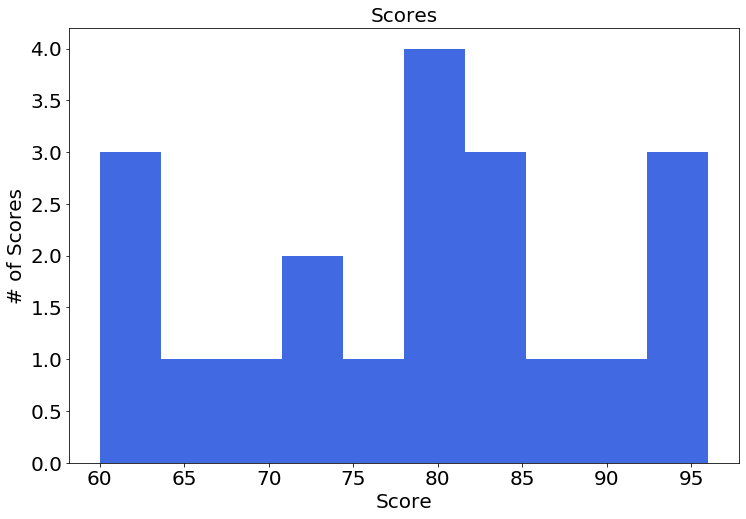

In [162]:
# Plot a histogram of the scores.
plt.figure(figsize=(12, 8))
scores.plot.hist(color='royalblue')
plt.title('Scores', fontsize=20)
plt.xlabel('Score', fontsize=20)
plt.ylabel('# of Scores', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

In [163]:
# Convert each of the numbers above into a letter grade.
# For example, 86 should be a 'B' and 95 should be an 'A'.
bin_edges = [0,60,70,80,90,100]
bin_labels = ['F', 'D', 'C', 'B', 'A']

print(pd.cut(scores, bins=bin_edges, labels=bin_labels))
print(pd.cut(scores, bins=bin_edges, labels=bin_labels).value_counts())
print(scores)

0     F
1     B
2     C
3     D
4     A
5     C
6     F
7     B
8     A
9     C
10    D
11    C
12    D
13    B
14    A
15    C
16    B
17    A
18    B
19    C
dtype: category
Categories (5, object): [F < D < C < B < A]
C    6
B    5
A    4
D    3
F    2
dtype: int64
0     60
1     86
2     75
3     62
4     93
5     71
6     60
7     83
8     95
9     78
10    65
11    72
12    69
13    81
14    96
15    80
16    85
17    92
18    82
19    78
dtype: int64


In [164]:
# Write the code necessary to implement a curve.
# I.e. that grade closest to 100 should be converted to a 100,
# and that many points should be given to every other score as well.
max_score = scores.max()
curve = 100 - max_score

scores_with_curve = scores + curve

In [120]:
# Use pandas to create a Series from the following string:
string = pd.Series(list('hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'))

In [123]:
# What is the most frequently occuring letter? Least frequently occuring?
most_common_letter = string.value_counts().nlargest(1)
least_common_letter = string.value_counts().nsmallest(1)
print(most_common_letter)
print(least_common_letter)

y    13
dtype: int64
l    4
dtype: int64


In [98]:
# How many vowels are in the list?
total_vowels = sum(training_series.str.count('[aeiou]'))
print(total_vowels)

34


In [99]:
# How many consonants are in the list?
total_consonants = sum(training_series.str.count('[^aeiou]'))
print(total_consonants)

166


In [100]:
# Create a series that has all of the same letters, but uppercased
upper_cased_string = training_series.str.upper()
print(upper_cased_string)

0      H
1      N
2      V
3      I
4      D
      ..
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object


In [101]:
# Create a bar plot of the frequencies of the 6 most frequently occuring letters.
training_series.value_counts().head(6)


y    13
p    12
w    10
b     9
n     9
m     9
dtype: int64